In [1]:
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os
# import sys, os
# sys.path.insert(0, '../lmu-rl-nengo')
# from rl.spaces.sspspace import HexagonalSSPSpace, RandomSSPSpace, SPSpace
# from rl.networks import ValueCritic, NeuralValueCritic, get_critic_transforms
# from rl.utils import sparsity_to_x_intercept
# import rl.figure_utils as utils
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy

/Users/nicoledumont/miniconda3/envs/widgets/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


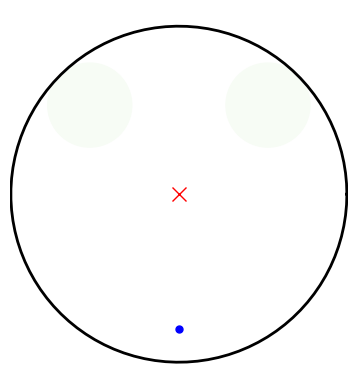

In [2]:
import numpy as np
import gymnasium as gym
import gym_water_maze
import matplotlib.pyplot as plt



env_args = {'render_trace': True, 'render_mode': 'rgb_array', 'radius': 20, 'goal_radius': 5,
            'action_radius': 1, 'bear_radius': 2, 'bear_speed': 0.5, 'bear_penalty': -1}
env = gym.make("ForageBearMaze-v0",**env_args)
obs, _ = env.reset()
im = env.render();

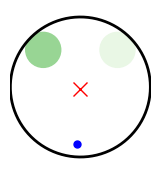

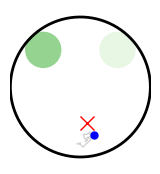

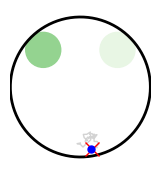

In [3]:
import numpy as np
import gymnasium as gym
import gym_water_maze
import matplotlib.pyplot as plt

obs, _ = env.reset()
for i in range(50):
    a = 2*np.random.rand(2) - 1
    obs,_,_,_,_ = env.step(a)
    if i%20==0:
        plt.figure(figsize=(2,2))
        env.render()

In [4]:
obs

array([ 3.15414653e+00, -1.48234598e+01, -4.41334973e-03,  6.91211307e-02,
       -3.25517596e-01,  1.57020013e+00,  3.14407279e-01, -1.39274899e+00,
       -7.94081504e-01,  3.83370247e+00,  4.46882432e-01, -1.99803520e+00,
       -4.83976639e-01,  2.17086294e+00,  5.73926121e-01, -2.59813760e+00,
       -4.05884163e-01,  1.81091663e+00])

In [5]:
log_dir = "./sb3log/"
os.makedirs(log_dir, exist_ok=True)
env = Monitor(env, log_dir)
set_random_seed(0)
model = PPO(MlpPolicy, env, verbose=0, learning_rate=0.0003,
            n_steps=512, batch_size=8, n_epochs=20, gamma=0.99,
            gae_lambda=0.95, clip_range=0.2, clip_range_vf=None,
            normalize_advantage=True, ent_coef=3.0e-5, vf_coef=0.2,
            max_grad_norm=0.8)

In [6]:
# Use a separate environement for evaluation
eval_env = gym.make("ForageBearMaze-v0",**env_args)

# Random Agent, before training
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:-72.00 +/- 0.00


/Users/nicoledumont/miniconda3/envs/widgets/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


In [7]:
# Train the agent for 10000 steps
model.learn(total_timesteps=50000)

In [8]:
# Evaluate the trained agent
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=100)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:7.85 +/- 2.43


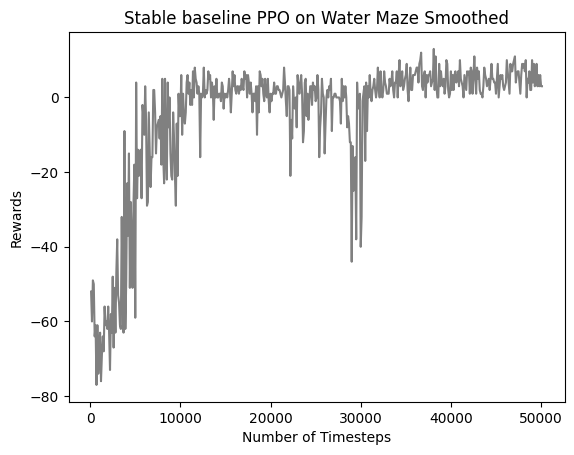

In [9]:

def plot_results(log_folder, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')

    # y_ma = moving_average(y, window=50)
    fig = plt.figure(title)
    plt.plot(x, y, color='grey' )
    # plt.plot(x[len(x) - len(y_ma):], y_ma, color='blue' )
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()

plot_results(log_dir, title='Stable baseline PPO on Water Maze')